# Project Human Language Technology - OffensEval2019
# Task 1
## biLSTM 

This notebook will explore a model for competition "OffensEval 2019: Identifying and Categorizing Offensive Language in Social Media" using bidirectional LSTM and GloVe 27B with Twitter data. \
Matricola: 505252 Michele Morisco

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp drive/MyDrive/Library/PreProcessing.py .
!cp drive/MyDrive/Library/LSTMClassifier.py .
!cp drive/MyDrive/Library/AnalysisGraph.py .

In [ ]:
!pip install emoji --upgrade
!pip install wordsegment
!pip install ekphrasis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from PreProcessing import load_dataset
from LSTMClassifier import prepare_model_dev, prepare_model_test, prepare_embeddings, BiLSTM
from AnalysisGraph import plot_curves_history, show_reportNoTorch, show_confusion_matrixNoTorch

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from tensorflow import keras
from sklearn.metrics import matthews_corrcoef, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import warnings
import logging
logging.basicConfig(level=logging.INFO)

from sklearn.metrics import f1_score

In [ ]:
#SET THE PARAMETERS FOR TRAINING 
H_PARAMETERS = {'num_lstm_nodes' : 64, 'num_hidden_layer' : 3, 'optimizer': keras.optimizers.Nadam(), 
                'dropout' : 0.5, 'max_sequence_length': 140, 'embedding_dim' : 100, 'num_epochs': 3, 'batch_size' : 128, 'L2_reg': 0.0}

In [ ]:
#dataset = open("OLID/olid-training-v1.0.tsv")
data, _ = load_dataset(dataset_path = 'drive/MyDrive/HLT/OLID/')

data.subtask_a.value_counts()

/usr/local/lib/python3.7/dist-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading english - 1grams ...
Reading english - 2grams ...


/usr/local/lib/python3.7/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


Reading english - 1grams ...


/content/PreProcessing.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet'][i] = str(" ".join(normalize(text_processor.pre_process_doc(text))))


user canada need another cuck already enough looney leave liberals fking great country qp roof trudeau must go


NOT    8840
OFF    4400
Name: subtask_a, dtype: int64

In [ ]:
data['tweet'].head(10)

0                       user ask native americans take
1    user go home drink maga trump2020 oncoming fis...
2    amazon investigate chinese employees sell inte...
3    user someone vetaken piece shit volcano face t...
4     user obama want liberals illegals move red state
5                                 user liberals kookoo
6                              user oh noes tough shit
7    user literally talk lol mass shoot like set up...
8                                    user buy icecream
9    user canada need another cuck already enough l...
Name: tweet, dtype: object

In [ ]:
data_shuffled = shuffle(data)
X = data_shuffled.tweet
le = LabelEncoder()
data_shuffled['subtask_a'] = le.fit_transform(data_shuffled['subtask_a'])
label = data_shuffled['subtask_a']
X_train, X_val, y_train, y_val = train_test_split(X, label, test_size = 0.2)

In [ ]:
print("Preparing model input ...")
X_train_Glove, X_val_Glove, word_index_dev = prepare_model_dev(X_train, X_val)
embeddings_dict = prepare_embeddings()

Preparing model input ...
Found 14940 unique tokens.
(13240, 140)
Total 1193514 word vectors.


In [ ]:
print("Building Model!")
model = BiLSTM(word_index_dev, embeddings_dict, H_PARAMETERS)
model.summary()

Building Model!
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 140, 100)          1494100   
                                                                 
 bidirectional (Bidirectiona  (None, 140, 128)         84480     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 140, 128)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 140, 128)         98816     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 140, 128)          0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 140

In [ ]:
history = model.fit(X_train_Glove, y_train,
                           validation_data=(X_val_Glove,y_val),
                           epochs=H_PARAMETERS['num_epochs'],
                           batch_size=H_PARAMETERS['batch_size'],
                           verbose=1)

Epoch 1/3
83/83 [==============================] - 275s 3s/step - loss: 0.5895 - accuracy: 0.6950 - val_loss: 0.5046 - val_accuracy: 0.7530
Epoch 2/3
83/83 [==============================] - 247s 3s/step - loss: 0.4828 - accuracy: 0.7728 - val_loss: 0.4735 - val_accuracy: 0.7768
Epoch 3/3
83/83 [==============================] - 249s 3s/step - loss: 0.4384 - accuracy: 0.8046 - val_loss: 0.4782 - val_accuracy: 0.7723


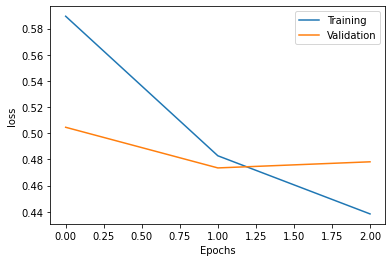

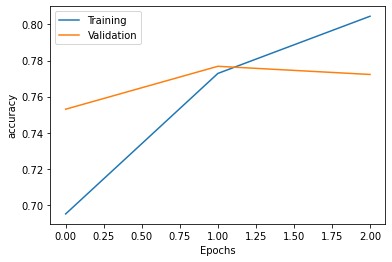

In [ ]:
plot_curves_history(history, 'loss')
plot_curves_history(history, 'accuracy')

In [ ]:
print("\n Evaluating Model ... \n")
#predicted = model.predict_classes(X_test_Glove)
predict_x=model.predict(X_val_Glove) 
predicted=np.argmax(predict_x,axis=1)


 Evaluating Model ... 

83/83 [==============================] - 19s 207ms/step


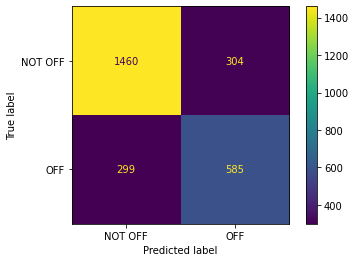

In [ ]:
show_confusion_matrixNoTorch(y_val, predicted, ["NOT OFF", "OFF"])

In [ ]:
show_reportNoTorch(y_val, predicted, ["NOT OFF", "OFF"])

              precision    recall  f1-score   support

     NOT OFF     0.8300    0.8277    0.8288      1764
         OFF     0.6580    0.6618    0.6599       884

    accuracy                         0.7723      2648
   macro avg     0.7440    0.7447    0.7444      2648
weighted avg     0.7726    0.7723    0.7724      2648



In [ ]:
test_data, label_test = load_dataset(dataset_path = 'drive/MyDrive/HLT/OLID/', dataset='testset-levela.tsv', dataset_label='labels-levela.csv')
X_test = test_data.tweet
X_test_Glove, word_index_test = prepare_model_test(X_test)

Reading english - 1grams ...
Reading english - 2grams ...
Reading english - 1grams ...


/content/PreProcessing.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet'][i] = str(" ".join(normalize(text_processor.pre_process_doc(text))))


bigg boss tamil janani task go first final listclapping hand clap hand clap hand clap hand
Found 4294 unique tokens.
(860, 140)


In [ ]:
print("\n Evaluating Model ... \n")
#predicted = model.predict_classes(X_test_Glove)
predict_x=model.predict(X_test_Glove) 
predicted=np.argmax(predict_x,axis=1)


 Evaluating Model ... 

27/27 [==============================] - 6s 207ms/step


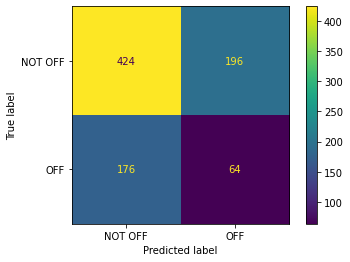

In [ ]:
show_confusion_matrixNoTorch(label_test, predicted, ["NOT OFF", "OFF"])

In [ ]:
show_reportNoTorch(label_test, predicted, ["NOT OFF", "OFF"])

              precision    recall  f1-score   support

     NOT OFF     0.7067    0.6839    0.6951       620
         OFF     0.2462    0.2667    0.2560       240

    accuracy                         0.5674       860
   macro avg     0.4764    0.4753    0.4755       860
weighted avg     0.5782    0.5674    0.5725       860



Now, compare it with GloVe with 6B

In [ ]:
#SET THE PARAMETERS FOR TRAINING 
H_PARAMETERS = {'num_lstm_nodes' : 64, 'num_hidden_layer' : 3, 'optimizer': keras.optimizers.Nadam(learning_rate = 0.0001), 
                'dropout' : 0.5, 'max_sequence_length': 140, 'embedding_dim' : 100, 'num_epochs': 4, 'batch_size' : 128, 'L2_reg': 0.0}

In [ ]:
embeddings_dict = prepare_embeddings(glove_file = 'glove.6B.100d.txt')

Total 400000 word vectors.


In [ ]:
print("Building Model!")
model = BiLSTM(word_index_dev, embeddings_dict, H_PARAMETERS)
model.summary()

Building Model!
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 140, 100)          1494100   
                                                                 
 bidirectional_4 (Bidirectio  (None, 140, 128)         84480     
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 140, 128)          0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 140, 128)         98816     
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 140, 128)          0         
                                                                 
 bidirectional_6 (Bidirectio  (None, 1

In [ ]:
history = model.fit(X_train_Glove, y_train,
                           validation_data=(X_val_Glove,y_val),
                           epochs=H_PARAMETERS['num_epochs'],
                           batch_size=H_PARAMETERS['batch_size'],
                           verbose=1)

Epoch 1/4
83/83 [==============================] - 272s 3s/step - loss: 0.6420 - accuracy: 0.6539 - val_loss: 0.6333 - val_accuracy: 0.6662
Epoch 2/4
83/83 [==============================] - 254s 3s/step - loss: 0.6202 - accuracy: 0.6703 - val_loss: 0.6082 - val_accuracy: 0.6869
Epoch 3/4
83/83 [==============================] - 252s 3s/step - loss: 0.5691 - accuracy: 0.7117 - val_loss: 0.5564 - val_accuracy: 0.7175
Epoch 4/4
83/83 [==============================] - 254s 3s/step - loss: 0.5370 - accuracy: 0.7352 - val_loss: 0.5438 - val_accuracy: 0.7255


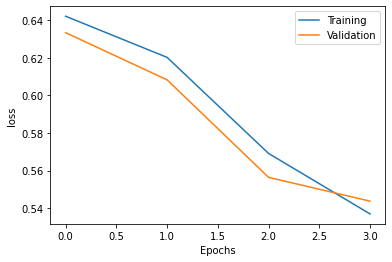

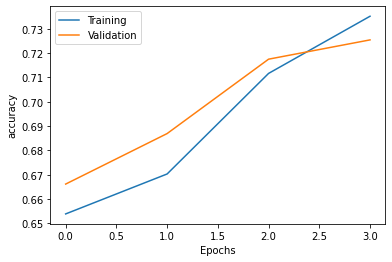

In [ ]:
plot_curves_history(history, 'loss')
plot_curves_history(history, 'accuracy')

In [ ]:
print("\n Evaluating Model ... \n")
#predicted = model.predict_classes(X_test_Glove)
predict_x=model.predict(X_val_Glove) 
predicted=np.argmax(predict_x,axis=1)


 Evaluating Model ... 

83/83 [==============================] - 19s 209ms/step


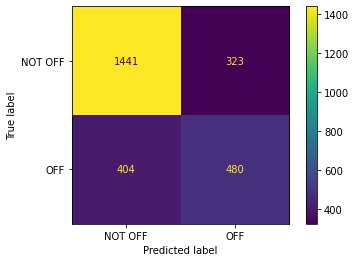

In [ ]:
show_confusion_matrixNoTorch(y_val, predicted, ["NOT OFF", "OFF"])

In [ ]:
show_reportNoTorch(y_val, predicted, ["NOT OFF", "OFF"])

              precision    recall  f1-score   support

     NOT OFF     0.7810    0.8169    0.7986      1764
         OFF     0.5978    0.5430    0.5691       884

    accuracy                         0.7255      2648
   macro avg     0.6894    0.6799    0.6838      2648
weighted avg     0.7198    0.7255    0.7219      2648

